<a href="https://colab.research.google.com/github/astrrr/quant-lab/blob/main/lab_py_fin_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import  pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")
sns.__version__

'0.12.2'

# **Randoms, Histogram & Normal Distribution**

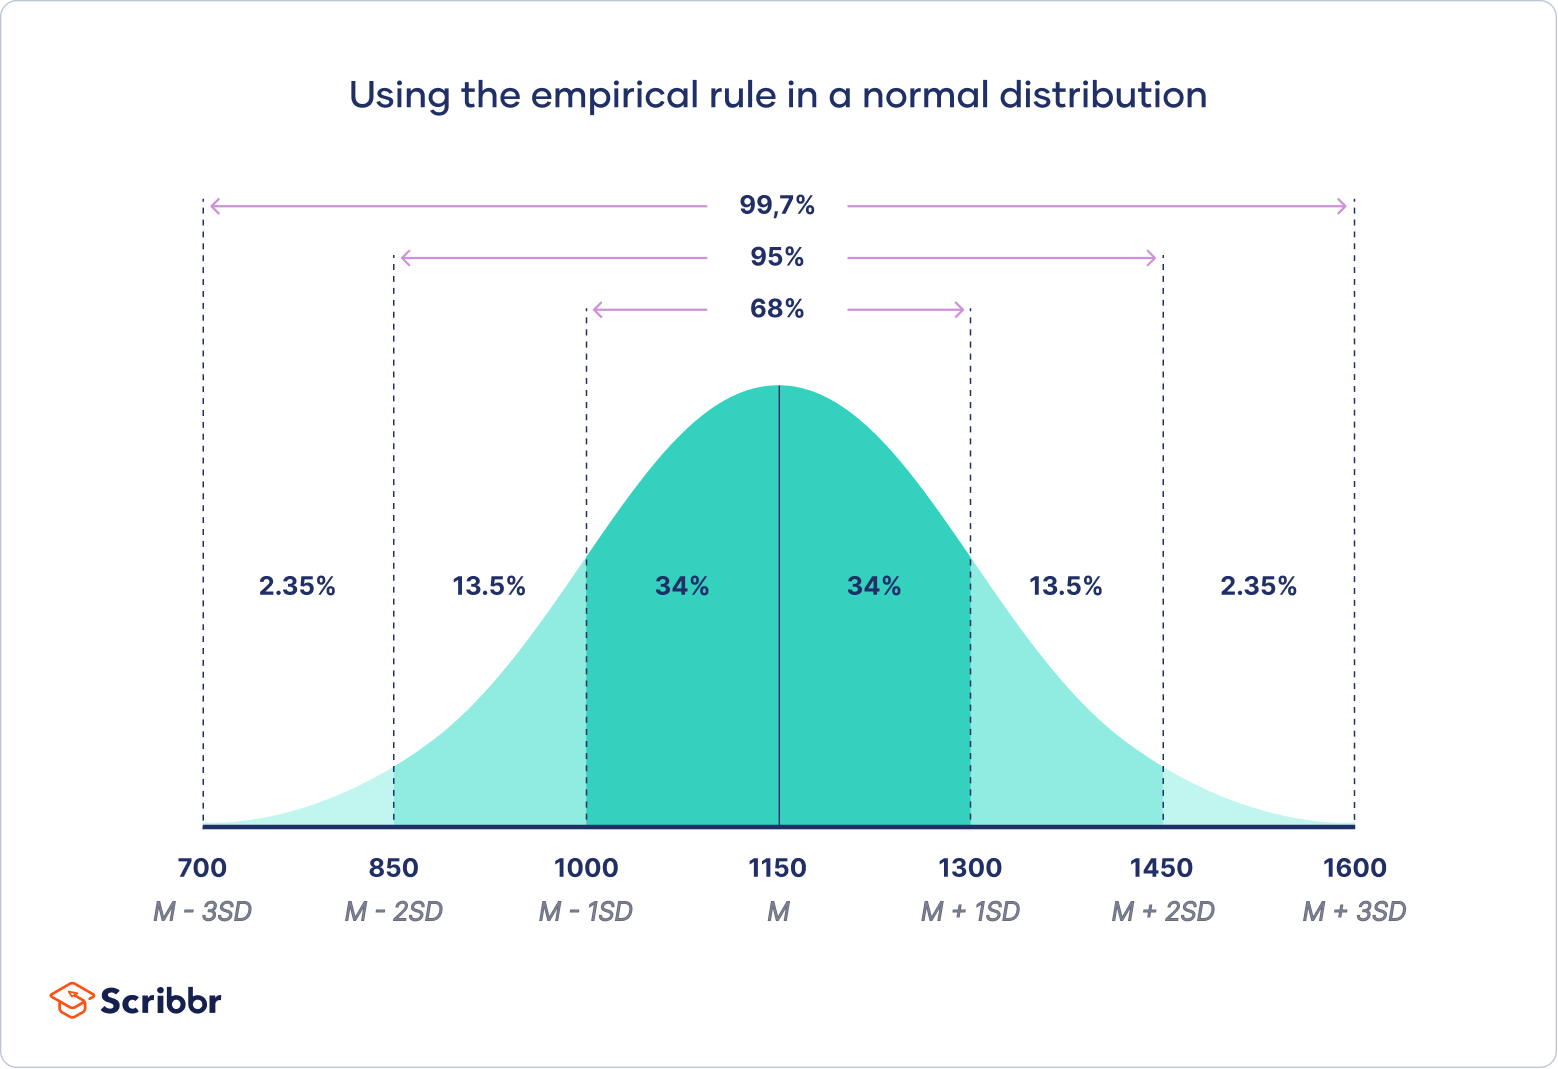

In [56]:
np.random.seed(33)
mu, sigma = 0, 0.05
stock_a = np.random.normal(mu, sigma, 10000)

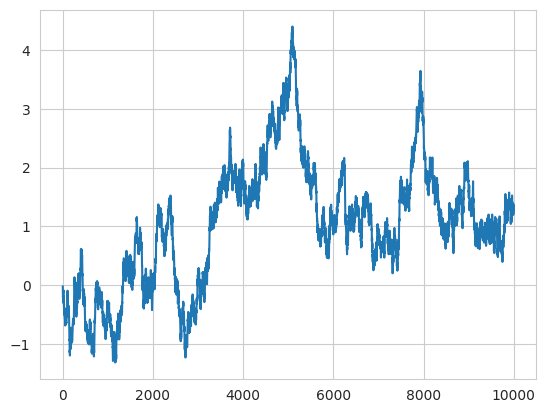

In [57]:
plt.plot(stock_a.cumsum())

<Axes: ylabel='Count'>

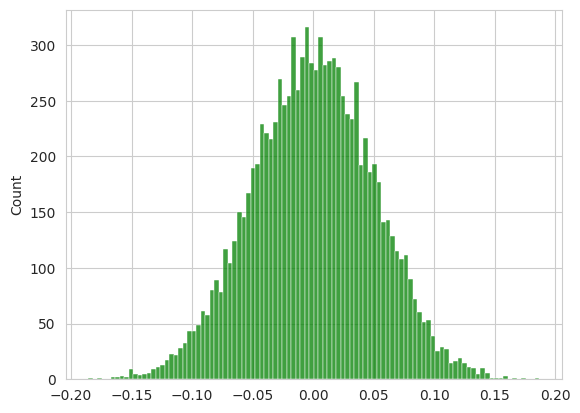

In [58]:
sns.histplot(stock_a, bins=100, color='green')

**real data**

In [59]:
df = yf.download('^DJI', interval='1H', start="2023-04-29", end="2023-06-30")

[*********************100%***********************]  1 of 1 completed


In [60]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-05-01 09:30:00,34116.808594,34205.601562,34116.808594,34158.558594,34158.558594,0
2023-05-01 10:30:00,34158.589844,34243.738281,34131.148438,34153.160156,34153.160156,32840006
2023-05-01 11:30:00,34152.859375,34203.539062,34139.898438,34197.460938,34197.460938,22148630
2023-05-01 12:30:00,34197.289062,34257.828125,34169.640625,34171.031250,34171.031250,21029933
2023-05-01 13:30:00,34171.261719,34181.308594,34124.199219,34134.800781,34134.800781,19383403


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 294 entries, 2023-05-01 09:30:00 to 2023-06-29 15:30:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       294 non-null    float64
 1   High       294 non-null    float64
 2   Low        294 non-null    float64
 3   Close      294 non-null    float64
 4   Adj Close  294 non-null    float64
 5   Volume     294 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 16.1 KB


<Axes: xlabel='Close', ylabel='Count'>

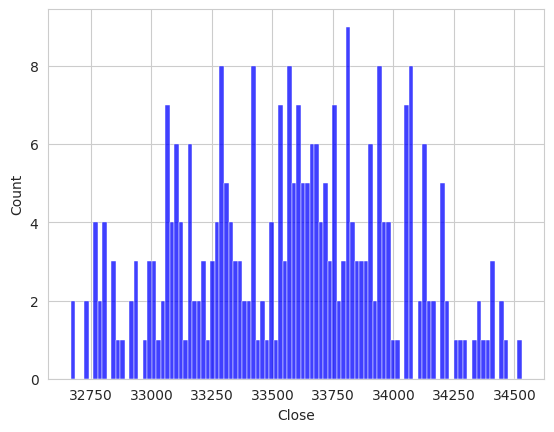

In [62]:
sns.histplot(df['Close'], bins=100, color='blue')

In [63]:
df_pct = df['Close'].pct_change().dropna()

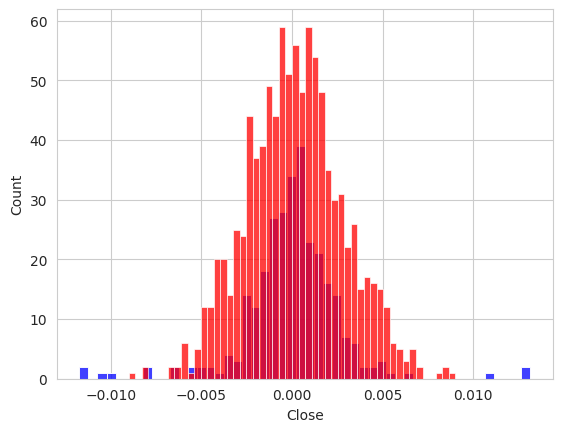

In [64]:

mu, sigma = df_pct.mean(), df_pct.std()
stock_a = np.random.normal(mu, sigma, 978)


sns.histplot(df_pct, bins=50, color='blue')
sns.histplot(stock_a, bins=50, color='red');

In [65]:
df_pct.shape

(293,)

# Mean

In [66]:
number = (3, 1, 5, 4, 2)
n = len (number)
mean = np.sum(number)/n
print(mean)

3.0


In [67]:
np.mean(number)

3.0

plot

US30 mean : 0.0 %


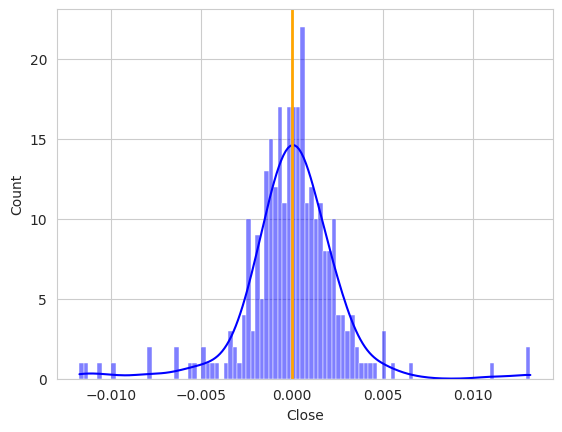

In [68]:
sns.histplot(df_pct, bins=100, color='blue', kde=True)
plt.axvline(np.mean(df_pct), color='Orange', linewidth=2)
print(f'US30 mean : {np.round(np.mean(df_pct), 5)} %')

# Median

In [69]:
number = (3, 1, 5, 4, 2, 6)
np.median(number)

3.5

US30 mean : 0.0 %
US30 median : 0.0001 %


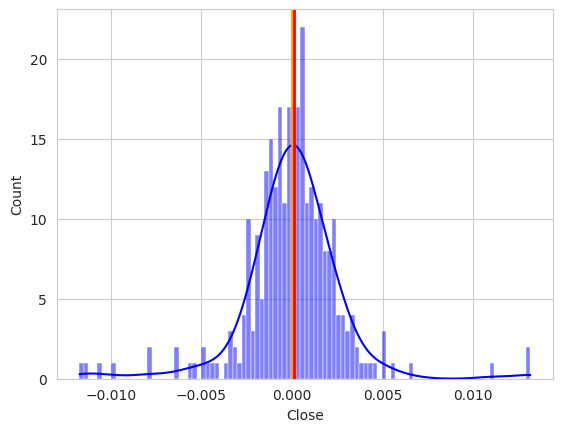

In [70]:
sns.histplot(df_pct, bins=100, color='blue', kde=True)
plt.axvline(np.mean(df_pct), color='Orange', linewidth=2)
plt.axvline(np.median(df_pct), color='Red', linewidth=2)
print(f'US30 mean : {np.round(np.mean(df_pct), 4)} %')
print(f'US30 median : {np.round(np.median(df_pct), 4)} %')

Mean > Median

In [71]:
from scipy.stats import skewnorm

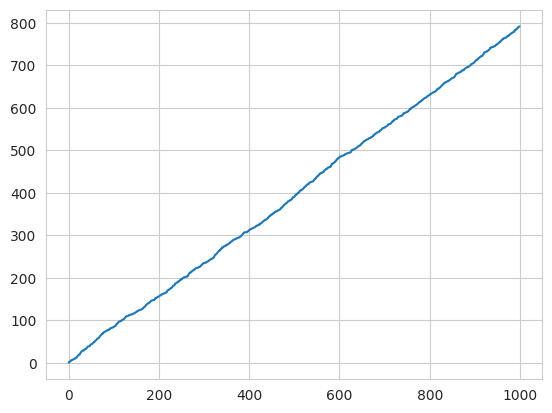

In [72]:
stock_b = skewnorm.rvs(10, size=1000)
plt.plot(np.cumsum(stock_b))

mean : 0.7916 %
median : 0.6426 %


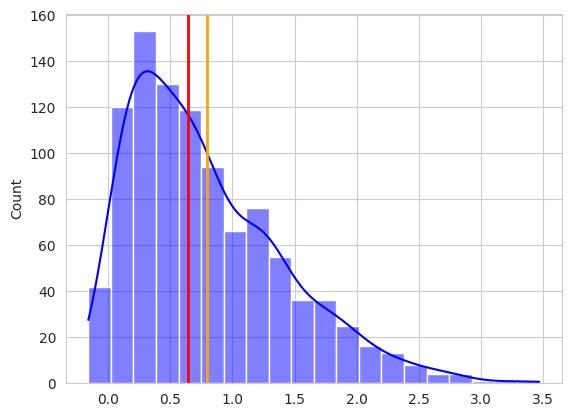

In [73]:
sns.histplot(stock_b, bins=20, color='blue', kde=True)
plt.axvline(np.mean(stock_b), color='Orange', linewidth=2)
plt.axvline(np.median(stock_b), color='Red', linewidth=2)
print(f'mean : {np.round(np.mean(stock_b), 4)} %')
print(f'median : {np.round(np.median(stock_b), 4)} %')

Meadian > Mean

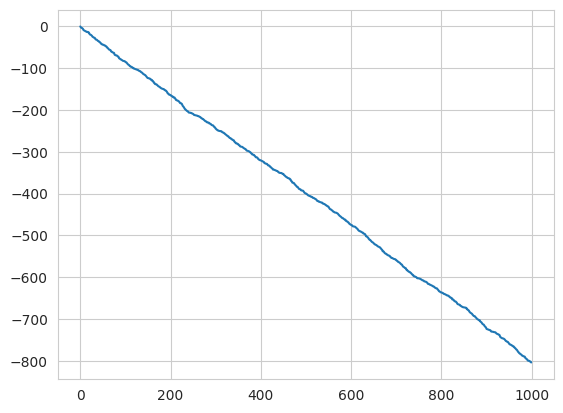

In [74]:
stock_c = skewnorm.rvs(-10, size=1000)
plt.plot(np.cumsum(stock_c))

mean : -0.8041 %
median : -0.6826 %


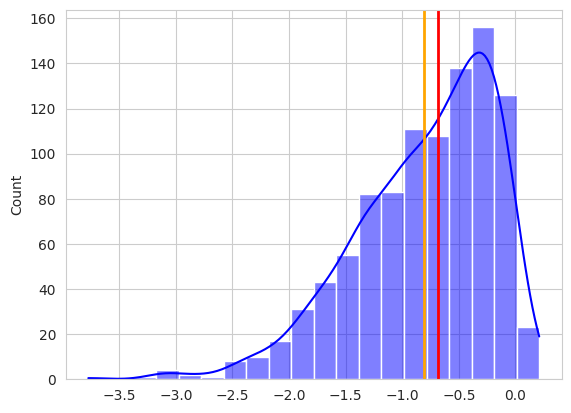

In [75]:
sns.histplot(stock_c, bins=20, color='blue', kde=True)
plt.axvline(np.mean(stock_c), color='Orange', linewidth=2)
plt.axvline(np.median(stock_c), color='Red', linewidth=2)
print(f'mean : {np.round(np.mean(stock_c), 4)} %')
print(f'median : {np.round(np.median(stock_c), 4)} %')

# Real data

<Axes: xlabel='Datetime'>

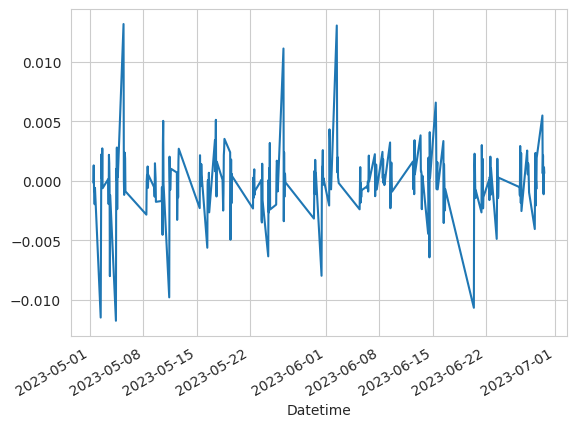

In [76]:
df_pct.plot()

mean : 0.0 %
median : 0.0001 %


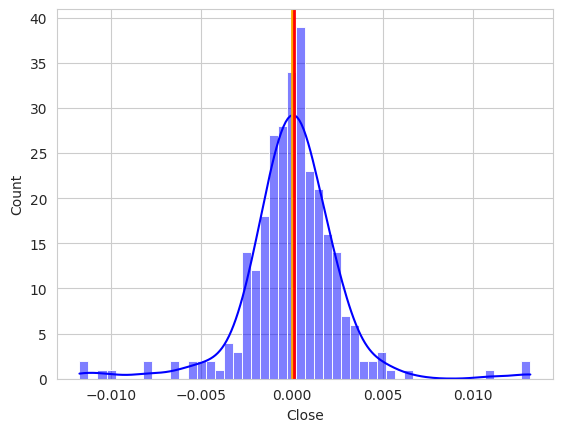

In [77]:
sns.histplot(df_pct, bins=50, color='blue', kde=True)
plt.axvline(np.mean(df_pct), color='Orange', linewidth=2)
plt.axvline(np.median(df_pct), color='Red', linewidth=2)
print(f'mean : {np.round(np.mean(df_pct), 4)} %')
print(f'median : {np.round(np.median(df_pct), 4)} %')

# Quantile and Percentile
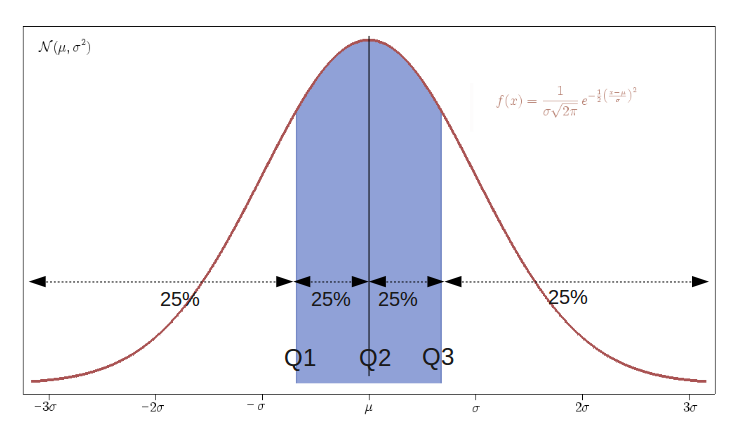

# Quantile

In [78]:
df_pct.quantile(0.25)*100

-0.11685806163738155

Text(0.3, 0.7, 'Q3: 0.1297121 %')

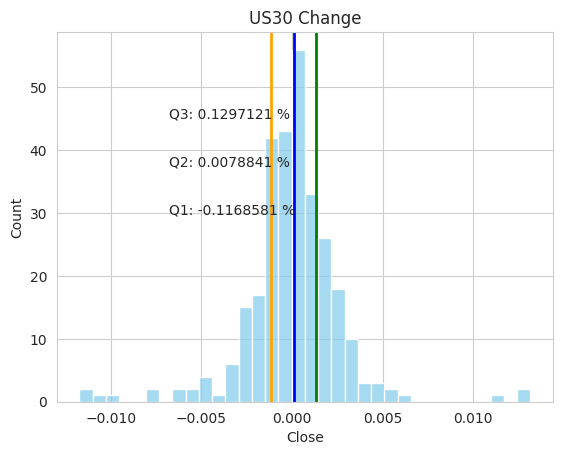

In [88]:
sns.histplot(df_pct, color='Skyblue')
plt.title("US30 Change")
q1 = df_pct.quantile(0.25)
q2 = df_pct.quantile(0.50)
q3 = df_pct.quantile(0.75)

plt.axvline(q1, color='Orange', linewidth=2)
plt.figtext(0.3, 0.50, f"Q1: {q1*100:.7f} %",fontsize=10)

plt.axvline(q2, color='Blue', linewidth=2)
plt.figtext(0.3, 0.60, f"Q2: {q2*100:.7f} %",fontsize=10)

plt.axvline(q3, color='Green', linewidth=2)
plt.figtext(0.3, 0.70, f"Q3: {q3*100:.7f} %",fontsize=10)

# Percentile

In [80]:
df_pct.head()

Datetime
2023-05-01 10:30:00   -0.000158
2023-05-01 11:30:00    0.001297
2023-05-01 12:30:00   -0.000773
2023-05-01 13:30:00   -0.001060
2023-05-01 14:30:00   -0.001963
Name: Close, dtype: float64

In [81]:
np.percentile(df_pct, 1)*100

-0.9845199529969593

In [82]:
np.percentile(df_pct, 99)*100

0.6926463450593755

ใช้ quantile มาหา percentile ก็ได้

In [83]:
df_pct.quantile(0.01)*100

-0.9845199529969593

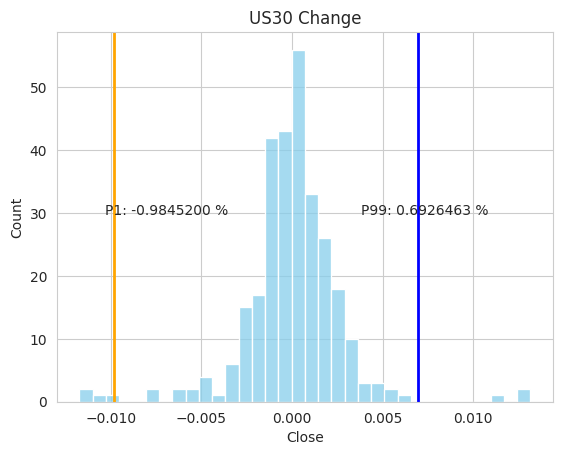

In [89]:
sns.histplot(df_pct, color='Skyblue')
plt.title("US30 Change")

p1 = np.percentile(df_pct, 1)
p99 = np.percentile(df_pct, 99)

plt.axvline(p1, color='Orange', linewidth=2)
plt.figtext(0.2, 0.50, f"P1: {p1*100:.7f} %",fontsize=10)

plt.axvline(p99, color='Blue', linewidth=2)
plt.figtext(0.6, 0.50, f"P99: {p99*100:.7f} %",fontsize=10)
plt.show()
